##Start up

### GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# path_x = "content/drive/MyDrive/Thesis/ampslope/"
# path_y = "content/drive/MyDrive/Thesis/y/"

# !ls -la {path_x}
# !ls -la {path_y}

# path_base = "content/drive/MyDrive/Thesis/src_tar_images_to_check/"
# !ls -la {path_base} #whyyyyyyyyy



### Import lib

In [ ]:
#Genna
!pip install -q segmentation_models



     |████████████████████████████████| 50 kB 6.3 MB/s 


In [ ]:
from segmentation_models.losses import binary_focal_dice_loss #this also exists..

Segmentation Models: using `keras` framework.


In [ ]:
import os
import glob
import numpy as np
import pandas as pd
# import tensorflow as tf
import pathlib
import re
import random
from tqdm.notebook import tqdm
import math
import itertools
import time
# import tensorflow as tf
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# import seaborn as sns

In [ ]:

import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
# from tf.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:

from skimage.io import imread
from skimage.transform import resize
# from keras.models import Sequence

In [ ]:
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randint
# from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
# from matplotlib import pyplot


# Enable TPU
Edit --> Notebook Settings --> TPU
Then check if TPU works

Ensure that the number of instances is perfectly divisible by the steps_per_epoch parameter so that all the instances are used during
training. For example, we have 60000 instances in our training set. 60000
is divisible by 50 so that means all our instances are fed into the model without any leftovers. If you hit run, it should start training on a TPU instance after a short while:


Basically should have that data is 256 all the time in batch not a leftover with less... Could get rid of the data that does not fit into it?

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)


Tensorflow version 2.6.0
Running on TPU  ['10.62.202.162:8470']
INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.62.202.162:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.62.202.162:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


In [ ]:
#This strategy ssems to not work?

# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


# Path ; set user defined properties

In [ ]:
tfrec_files_test = tf.io.gfile.glob("gs://kds-fb4c9db2eeda8b5477c4a6f6c0060aff5b6e581e9a031e7936b918cf/*") #a ratio mask #up to date

In [ ]:
len(tfrec_files_test)

4

In [ ]:
tfrec_files_test

['gs://kds-fb4c9db2eeda8b5477c4a6f6c0060aff5b6e581e9a031e7936b918cf/dif_test_ls0.tfrec',
 'gs://kds-fb4c9db2eeda8b5477c4a6f6c0060aff5b6e581e9a031e7936b918cf/dif_test_ls1.tfrec',
 'gs://kds-fb4c9db2eeda8b5477c4a6f6c0060aff5b6e581e9a031e7936b918cf/dif_test_ls2.tfrec',
 'gs://kds-fb4c9db2eeda8b5477c4a6f6c0060aff5b6e581e9a031e7936b918cf/dif_test_ls3.tfrec']

In [ ]:

# path_base = "/content/drive/MyDrive/Thesis/dif_dem/"
# path_base = "/content/drive/MyDrive/Thesis/dif_incl_mask_v3/"
path_result = path_base + 'results/'
path_model = path_base + "models/"
# path_model = path_base + "models/"

# !ls -la {path_base}
# !ls -la {path_model}
# !ls -la {path_result}



In [ ]:
#depends on ds
#for ls ampslope
#asc,des
# max_sar_src_des = 26 #des
# max_sar_src_asc = 24 #asc
#for big ls amplsope #same as for ls


#for a ratio

#for a ratio --> also change the src[:,:,:,0] or not?..

In [ ]:

def list_files(startpath):
    fn_root = []
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        # print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        fn_root.append(root)
        # for f in files:
        #     print('{}{}'.format(subindent, f))
        #     fn.append(f)


    return fn_root

fn = list_files(path_result)

In [ ]:
path_learning_curve = path_base + "learning_curve/"
path_loss_history = path_base + "loss_history"
path_cm = path_base + "cm/"
path_images = path_base + "test_images/"
path_precision_recall = path_base + "precision_recall/"
path_images_tar = path_base + "test_images_tar/"

In [ ]:
path_learning_curve

'/content/drive/MyDrive/Thesis/dif_dem/learning_curve/'

In [ ]:
path_loss_history

'/content/drive/MyDrive/Thesis/dif_dem/loss_history'

In [ ]:
fn

['/content/drive/MyDrive/Thesis/dif_dem/results/',
 '/content/drive/MyDrive/Thesis/dif_dem/results/attempt_1_0410_bcedice_bsize_512',
 '/content/drive/MyDrive/Thesis/dif_dem/results/attempt_1_0410_bcedice_bsize_256',
 '/content/drive/MyDrive/Thesis/dif_dem/results/attempt_2_0410_bcedice_bsize_512',
 '/content/drive/MyDrive/Thesis/dif_dem/results/attempt_2_0410_bcedice_bsize_256',
 '/content/drive/MyDrive/Thesis/dif_dem/results/attempt_1_0710_bcedice_bsize_128',
 '/content/drive/MyDrive/Thesis/dif_dem/results/attempt_1_0710_bcedice_bsize_32']

In [ ]:
# os.makedirs(path_learning_curve)
# os.makedirs(path_loss_history)
# os.makedirs(path_images)
# os.makedirs(path_cm)
# os.makedirs(path_precision_recall)
# os.makedirs(path_images_tar)

# Learning curve
With iou and dice

## IoU and dice

In [ ]:
def load_metric(name_txt_file,path_to_txt_file=path_result):

  metric_epochs = []
  with open (path_to_txt_file + name_txt_file, mode= 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
      metric_per_batch_per_epoch = lines[i].strip().split()
      metric_mean_per_epo = np.mean(np.array(metric_per_batch_per_epoch,dtype = np.float32))
      metric_epochs.append(metric_mean_per_epo)
  return metric_epochs

In [ ]:
def learning_curve(dice,dice_val,iou,iou_val,name_fig,name_result = result_part,path_to_save_result=path_learning_curve,num_epochs=100):
  epochs_range = range(num_epochs)

  plt.figure(figsize=(10, 5), dpi=200)
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, dice, label='Training')
  plt.plot(epochs_range, dice_val, label='Validation')
  plt.legend(loc='lower right')
  plt.title('Training and Validation IoU')
  plt.xlabel('Epoch')
  plt.ylabel('IoU')
  plt.ylim(0, 1)

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, iou, label='Training')
  plt.plot(epochs_range, iou_val, label='Validation')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Dice')
  plt.xlabel('Epoch')
  plt.ylabel('Dice')
  plt.ylim(0, 0.8)
  
  print(path_to_save_result)
  plt.savefig(path_to_save_result + name_result+ name_fig + '.png',dpi=300, bbox_inches='tight')
  # plt.tight_layout()
  plt.show()

In [ ]:
dice_epochs = load_metric("dice_over_epochs.txt")

In [ ]:
# dice_test_epochs = load_metric("dice_test_over_epochs.txt")

In [ ]:
# learning_curve(dice_epochs,dice_test_epochs,iou_epochs,iou_test_epochs,'learningcurve_iou_dice')

In [ ]:
!ls -la {path_learning_curve}

## Iou only

In [ ]:
def load_metric_iou(name_txt_file,path_to_txt_file):

  metric_epochs = []
  with open (path_to_txt_file + name_txt_file, mode= 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
      metric_per_batch_per_epoch = lines[i].strip().split()
      metric_mean_per_epo = np.mean(np.array(metric_per_batch_per_epoch,dtype = np.float32))
      metric_epochs.append(metric_mean_per_epo)
  return metric_epochs

In [ ]:
def learning_curve_v1(iou,iou_val,path_to_txt_file,name_result,name_fig,path_to_save_result=path_learning_curve):
  num_epochs = len(iou)
  epochs_range = range(num_epochs)
  
  plt.figure(figsize=(5, 5), dpi=200)
  plt.plot(epochs_range, iou, label='Training')
  plt.plot(epochs_range, iou_val, label='Validation')
  plt.legend(loc='lower right')
  plt.title('Training and Validation IoU')
  plt.xlabel('Epoch')
  plt.ylabel('IoU')
  plt.ylim(0, 1)


  plt.savefig(path_to_save_result + name_result + name_fig + '.png',dpi=300, bbox_inches='tight')
  plt.tight_layout()
  plt.show()
  plt.close()

# Loss curve

This is shit with the axis rn

In [ ]:
def load_metric_loss(name_txt_file,path_to_txt_file,fill_nan_value = -0.01):
#hopefully works as well for nested lists...
  metric_epochs = []
  with open (path_to_txt_file + name_txt_file, mode= 'r') as f:
    lines = f.readlines()
    # print(lines)

    for i in range(len(lines)):
      metric_per_batch_per_epoch = lines[i].strip().split()
      # print(metric_per_batch_per_epoch) #so now need to split on ,
      for i in range(len(metric_per_batch_per_epoch)):
        metric_per_batch = metric_per_batch_per_epoch[i].split(',')
        # print(float(metric_per_batch[0]))
        metric_epochs.append(float(metric_per_batch[0]))

    arr = np.array(metric_epochs)
    #fill nan value
    arr[np.isnan(arr)] = fill_nan_value  

      # metric_epochs

  return arr

### plot the curve

str() --> float
nan --> None of 0
list --> np array!

In [ ]:
# create a line plot of loss for the gan and save to file
def plot_history(path_to_txt_file,name_result,path_to_save_result = path_loss_history):
  #why is this plot such bullshit?? Bc it doesnt represent the values truthfully!

  d1 = load_metric_loss('/d1.txt',path_to_txt_file)
  d2 = load_metric_loss('/d2.txt',path_to_txt_file)
  g = load_metric_loss('/g.txt',path_to_txt_file)

  # print(max(d1),max(d2),max(g))

  plt.figure(figsize=(5,5))
  plt.plot(d1,label = 'd-real')
  plt.plot(d2, label='d-fake')
  plt.plot(g, label='gen')


 

  # plt.text(0,500,(f'max d1,d2,g are ' {max(d1_hist):.2f} 'respectively'))
  # plt.yticks([])
  # plt.yticks([0,1e-3,1e-2,1e-3,5e-1,1,100],labels = ['0','1e-3','1e-2','1e-3','5e-1','1','100'])
  plt.legend()

  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
 
	# # save plot to file
  plt.savefig(path_to_save_result + name_result + 'plot_line_plot_loss.png',dpi=300, bbox_inches='tight')
  plt.show()
  plt.close()

# Run the learning curves

Go with loop over fn and save all their learning curves (iou and losses) under the resp. folders and with names incl. part of the filepath of fn. The latter is to know to which results a certain plot belongs.

In [ ]:
fn = list_files(path_result)

In [ ]:
f = fn[1:-1]
f

['/content/drive/MyDrive/Thesis/dif_dem/results/attempt_1_0410_bcedice_bsize_512',
 '/content/drive/MyDrive/Thesis/dif_dem/results/attempt_1_0410_bcedice_bsize_256',
 '/content/drive/MyDrive/Thesis/dif_dem/results/attempt_2_0410_bcedice_bsize_512',
 '/content/drive/MyDrive/Thesis/dif_dem/results/attempt_2_0410_bcedice_bsize_256',
 '/content/drive/MyDrive/Thesis/dif_dem/results/attempt_1_0710_bcedice_bsize_128']

In [ ]:
#get result part / name from f.
# f[0].split("/") #if you use slash its not representatie. Need to use attempt

def run_curves(f):
  "f are the dirs in the folder of each run which lead to the results txt files of each run "
  for i in range(len(f)):
    file = f[i]

    result_part = file.split('/attempt_')[-1]

    # print(path_learning_curve + result_part)
    

    # iou_epochs = load_metric_iou("/iou_over_epochs.txt",path_to_txt_file=file)
    # iou_test_epochs = load_metric_iou("/iou_test_over_epochs.txt",path_to_txt_file=file)
    # learning_curve_v1(iou_epochs,iou_test_epochs,path_to_txt_file=file,name_result=result_part,name_fig='_learning_curve_iou')
    # print(path_loss_history+result_part)
    plot_history(path_to_txt_file = file,name_result = result_part) #why not doing this
    
    


  

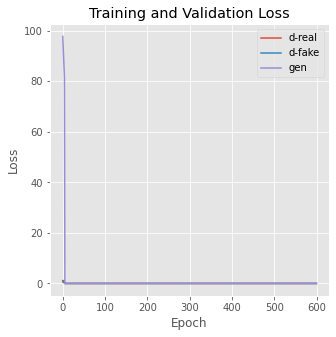

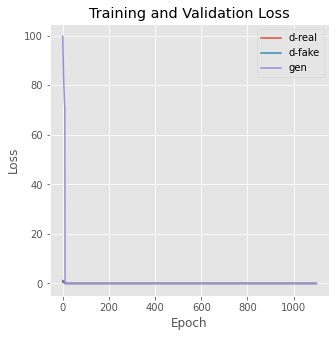

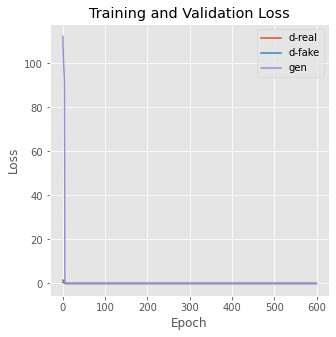

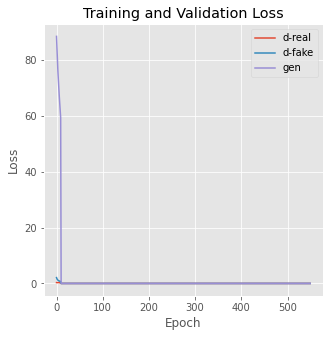

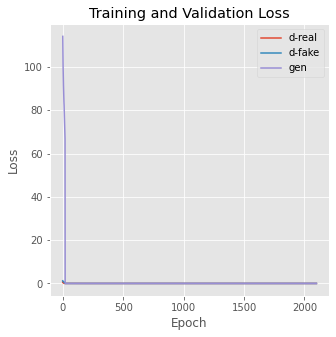

In [ ]:
run_curves(f) #ALSO FOR BIG LS , THEN DONE. aND UNDERSAMPLED ONES NICE. buT OG NO

# TF  Dataset

In [ ]:
# global parameters
P = {

    'SEED': 42,
     
    # image size to sample
    # 'SIZE': 160, 
    # 'SIZE': 224, 
     'SIZE': 256, 
    # 'SIZE': 320,
    # 'BATCH_SIZE': 32 * strategy.num_replicas_in_sync, #256.. 64 is 512. 
    
    # 'FOLDS': 5,
    
    # 'LEARNING_RATE': 0.00075,
    
    'EPOCHS': 100,
     
    # 'VERSION': 'v6'
}

### Parse and decode tfrec

In [ ]:
dim = 256

In [ ]:
#with image as string

def parse_record(record):
  tfrecord_format = {
    "x": tf.io.FixedLenFeature([],tf.string),
    "Y": tf.io.FixedLenFeature([],tf.string)
    }
  return tf.io.parse_single_example(record, tfrecord_format) 

In [ ]:
#return to image, so decode parse record
def decode_record(record):

  record_parsed = parse_record(record)
  # dataType = float32
  x = tf.io.decode_raw(
      record_parsed['x'],out_type = float
  )
  y = tf.io.decode_raw(
      record_parsed['Y'],out_type = float      
  )


  image_x = tf.reshape(x,(dim,dim,1))
  image_y = tf.reshape(y,(dim,dim,1))



  return image_x,image_y


In [ ]:
# #amspslope
# def parse_record(record):
#   tfrecord_format = {
#     "Y": tf.io.FixedLenFeature([],tf.string),
#     "sar1": tf.io.FixedLenFeature([],tf.string),
#     "sar2": tf.io.FixedLenFeature([],tf.string),
#     "dem": tf.io.FixedLenFeature([],tf.string)
   
#     }
#   return tf.io.parse_single_example(record, tfrecord_format) 

In [ ]:
# #return to image, so decode parse record
# def decode_record(record):

#   record_parsed = parse_record(record)
#   # dataType = float32
#   b1 = tf.io.decode_raw(
#       record_parsed['sar1'],out_type = float
#   )
#   b2 = tf.io.decode_raw(
#       record_parsed['sar2'],out_type = float
#   )
#   dem = tf.io.decode_raw(
#       record_parsed['dem'],out_type = float
#   )
#   y = tf.io.decode_raw(
#       record_parsed['Y'],out_type = float      
#   )

 
#   # #images are flattened, so have to put back to og shape
#   b1 = tf.reshape(b1,(dim,dim))  #w, h 256,256
#   b2 = tf.reshape(b2,(dim,dim))
#   dem = tf.reshape(dem,(dim,dim))
#   # y1 = tf.reshape(y,(dim,dim))

#   # #might want to stack them before
#   image_x = tf.stack((b1,b2,dem),axis = -1) #if axis = -1 then get (nr im,w,h,3)


#   # y2 = tf.experimental.numpy.full_like(y1,-1,dtype= tf.float32)
#   # y3 = tf.experimental.numpy.full_like(y1,-1,dtype= tf.float32)
#   # image_y = tf.stack((y1,y2,y3),axis = -1)

#   image_y = tf.reshape(y,(dim,dim,1)) #maybe this doesnt work for the prev. g_models of ampslope
#   return image_x,image_y


## create ds

In [ ]:

AUTO = tf.data.AUTOTUNE
ignore_order = tf.data.Options()
ignore_order.experimental_deterministic = False

def get_validation_dataset(files, len_shuffle,batch_size,ordered=True,seed=P['SEED']):
    dataset = tf.data.TFRecordDataset(files, num_parallel_reads=AUTO)
    dataset = dataset.with_options(ignore_order)
    dataset = dataset.cache()
    # dataset = dataset.map(lambda ex: decode_record(ex), num_parallel_calls=AUTO)
    dataset = dataset.map(decode_record, num_parallel_calls=AUTO)
    dataset = dataset.shuffle(buffer_size= len_shuffle, seed=seed) 
    dataset = dataset.batch(batch_size, drop_remainder=False)
    dataset = dataset.prefetch(AUTO)

    return dataset

#Prediction with test set

## Def predictions (for test and/or train)

In [ ]:


def get_precision(tp,fp):
  """"
  Precision =  tp / tp+fp
  """""
  precision = tp / (fp+tp)
  return precision
  

def get_recall(tp,fn):
  """"
  Recall = True Positive Rate (TPR) = TP/(TP+FN)
  """""
  recall = tp  / (tp+fn)
  return recall


def get_fpr(fp,tn):
  """"
  False Positive Rate = FP/FP+TN
  """""
  fpr = fp  / (fp+tn)
  return fpr

# with fpr and tpr (recall) can make ROC curve.. which is based on varying threshold. Of what?.. Of the casting threshold?

In [ ]:
def predict_cm(ds,model):
  """" 
  In this function, predict the confusion matrix for each image in a dataset.
  The confusion matrix is based on pixel values (tp,tf,tn,fn), so it is done on each image in the ds in a forloop.
  Then the cm's of all images are summed togehter to give an overview of the total amount of pixel classification accross all images in the dataset.
  """""
  
  # cm0 = tf.zeros([2,2],dtype = tf.int32) 
  #not sure how to add to a tensor while in a forloop, so lets do it with a counter,via numpy
  tn_t = 0
  fn_t = 0
  fp_t = 0
  tp_t = 0

  list_recall = []
  list_precision = []
  for x,y in ds:

    tar = y[:,:,:,0]
    pred = model.predict(x)
    pred_tar = pred[:,:,:,0]

    
    for i in range(y.shape[0]):
      truth = tf.cast(tar[i]>0.0, dtype=tf.float32) #256,256 pixels no outcome of 256,256 --> so each pixel is cast to either 0 or 1 according to threshold
      pre = tf.cast(pred_tar[i]>0.0, dtype=tf.float32)

      #flatten such that cm can be calculated
      truth_cm = tf.reshape(truth,[256*256])
      pre_cm = tf.reshape(pre,[256*256])
      cm = tf.math.confusion_matrix(truth_cm,pre_cm,num_classes = 2)
      cm_arr = cm.numpy()
      tn = cm_arr[0][0]
      fn = cm_arr[1][0]
      tp = cm_arr[1][1]
      fp = cm_arr[0][1]

      #recall,precision, pixel based, per image
      recall = get_recall(tp,fn)
      precision = get_precision(tp,fp)

      list_recall.append(recall)
      list_precision.append(precision)

      tn_t += tn
      fn_t += fn
      tp_t += tp
      fp_t += fp


    cm_t = [[tn_t,fp_t],[fn_t,tp_t]]
    return cm_t,list_precision,list_recall

In [ ]:
def plot_cf(cm,name_fig,name_result,path_to_save = path_cm):
  #cm is confusion matrix, where it is tn, fn upper row and fp,tp lower row in that order. Its a np array
  n_n = cm[0][0]+cm[0][1]#).numpy()
  n_p = cm[1][0]+cm[1][1]#).numpy()


  plt.figure(figsize=(6,6))
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
  classNames = ['Negative','Positive']
  plt.title('Confusion matrix on pixel level -- Landslide vs. non Landslide')
  plt.ylabel('True label \n %i pixels' %n_p)
  plt.xlabel('Predicted label \n %i pixels' %n_n)
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
          
  fn = path_to_save + name_result + name_fig + '.png'
  plt.savefig(fn,dpi=300, bbox_inches='tight')
  plt.show()
  plt.close()

In [ ]:
def plot_precision_recall(list_precision,list_recall,name_fig,name_result,path_to_save = path_precision_recall):
    
    f = plt.figure(figsize = (6,6))
    f.add_subplot(1,2, 1)
    plt.hist(list_recall)
    plt.ylabel("Frequency")
    plt.xlabel("Recall (-)")
    plt.title('Recall across images')
    plt.subplot()
    plt.hist(list_precision)
    plt.ylabel("Frequency")
    plt.xlabel("Precision (-)")
    plt.title("Precision accross images")
    fn = path_to_save + name_result + name_fig + '.png'
    plt.savefig(fn,dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()


In [ ]:
#function to map from left (original) to right (scaled)
def inverse_scaleGrid(input_grid,leftMin,leftMax, rightMin,rightMax): 
  '''
  objective: bring the scaled data into the original range
  input_grid: grid with values
  leftMin,leftMax: min and max of the original input grid
  rightMin,rightMax: min and max of the range to which the data was mapped  
  '''
  leftSpan = leftMax - leftMin
  rightSpan=rightMax-rightMin
 
  valueInversedScaled = (input_grid - rightMin)/rightSpan
  valueInversedScaled = valueInversedScaled * leftSpan + leftMin
 
  return valueInversedScaled

In [ ]:
def scaleGrid(input_grid,leftMin,leftMax, rightMin,rightMax):
  '''
  objective: map the values of the input grid to the proposed range
  input_grid: grid with values
  leftMin,leftMax: min and max of the original input grid
  rightMin,rightMax: min and max of the range to which the data is mapped  
  '''
 
  leftSpan = leftMax - leftMin
  rightSpan= rightMax - rightMin
 
  valueScaled = (input_grid - leftMin) / float(leftSpan)
  valueScaled = np.round(rightMin + (valueScaled * rightSpan),4)

 
  return valueScaled

In [ ]:
def iou_coe(output, target, axis,threshold=0.0, smooth=1e-5):
# def iou_coe(output, target, threshold=0.0, axis=(1,2,3), smooth=1e-5):
    """" With tanh threshold = 0.0
    """ 

    """Non-differentiable Intersection over Union (IoU) for comparing the
    similarity of two batch of data, usually be used for evaluating binary image segmentation.
    The coefficient between 0 to 1, and 1 means totally match.

    Parameters
    -----------
    output : tensor
        A batch of distribution with shape: [batch_size, ....], (any dimensions).
    target : tensor
        The target distribution, format the same with `output`.
    threshold : float
        The threshold value to be true.
    axis : tuple of integer
        All dimensions are reduced, default ``(1,2,3)``.
    smooth : float
        This small value will be added to the numerator and denominator, see ``dice_coe``.

    Notes
    ------
    - IoU cannot be used as training loss, people usually use dice coefficient for training, IoU and hard-dice for evaluating.

    """

   
    pre = tf.cast(output > threshold, dtype=tf.float32)
    truth = tf.cast(target > threshold, dtype=tf.float32)

    #multiply and then the sum gives the intersection
    inse = tf.reduce_sum(tf.multiply(pre, truth), axis=axis)  # AND
    #add and them sum gives union
    union = tf.reduce_sum(tf.cast(tf.add(pre, truth) >= 1, dtype=tf.float32), axis=axis)  # OR
    batch_iou = (inse + smooth) / (union + smooth)
    iou = tf.reduce_mean(batch_iou, name='iou_coe')
    return iou  # , pre, truth, inse, union

In [ ]:
def plot_test_images(src_img,tar_img,pred_img,min_sar_src,max_sar_src,iou,name,step, name_result, path_to_save_fig = path_images):
  """"
  for ampslope aka src image sar1,sar2,dem
  first convert the images back to [0,255], with threshold (scale back) (just use inverse scale with map function?)
  here everything below 0 is converted to 0 (nonls), everything above 0 is converted to 1 (ls)
  Then it is backscaled by multiplying by 255 ( 0 * 255 = 0, 1 * 255 = 255) 
  """""

  cast_tar =  tf.math.multiply(tf.cast(tar_img > 0.0,tf.int32),255)
  cast_pred = tf.math.multiply(tf.cast(pred_img > 0.0,tf.int32),255)
  
  #first from -1,1 to og min and max
  cast_src = inverse_scaleGrid(src_img,min_sar_src, max_sar_src,-1,1)
  #then to plt imshow ?
  cast_src_imshow = scaleGrid(src_img,min_sar_src,max_sar_src,0,255) # to int?
  # cast_src_imshow = scaleGrid(src_img,min_sar_src,max_sar_src,0,1) # to float?



  images = [cast_src_imshow,cast_tar,cast_pred]

  titles = ["source","true target","predicted target"]

  f = plt.figure()
  f.add_subplot(1,3, 1)
  plt.title(titles[0])
  plt.imshow(images[0])
  plt.axis('off')
  
  
  f.add_subplot(1,3, 2)
  # print(iou)
  plt.title(titles[1])
  # plt.title(titles[1]+ ": " +name + "\n" + "iou is: %1.1e" % iou) #put iou as float instead!
  plt.imshow(images[1])
  plt.axis('off')
  
  f.add_subplot(1,3, 3)
  # print(iou)
  plt.title(titles[2])
  # plt.title(titles[1]+ ": " +name + "\n" + "iou is: %1.1e" % iou) #put iou as float instead!
  plt.imshow(images[2])
  plt.axis('off')

  plt.savefig(path_to_save_fig + name_result + name+ "%s_.png" % str(step),dpi=300, bbox_inches='tight')


  # plt.show(block=True) #always do show after savefig!
  plt.close()

In [ ]:
path_images

'/content/drive/MyDrive/Thesis/dif_incl_mask_v3/test_images/'

In [ ]:
def predict_summ(ds,model,min_sar_src,max_sar_src,name_result):

#still need to put in vis_im, but only a few times not for entire ds...

  #save these amounts
  n_tar_ls = 0
  n_tar_non_ls = 0
  n_tp = 0
  n_fp = 0
  n_fn = 0
  n_tn = 0

  #counters for plotting images
  counter_tp = 0
  counter_fp = 0
  counter_tn = 0
  counter_fn = 0

  for [x,y] in tqdm(ds):
    #pred
    pred = model.predict(x)

    #nondummy bands
    target = y[:,:,:,0]
    pred_target = pred[:,:,:,0]
    source = x[:,:,:,0] #A ratio

    # print('nondummy bands',target.shape,pred_target.shape,source.shape)

    iou_tp_batch = []
    iou_fp_batch = []
    iou_fn_batch = []
    iou_tn_batch = []



    #for each sample/image (or do batch of 1) --> do same batch size as used for model..?
    for i in range(target.shape[0]):
      
      tar = target[i,:,:]
      pred_tar = pred_target[i,:,:]
      src = source[i,:,:]

      # print('within',tar.shape,pred_tar.shape,src.shape)

      

      #if ls image

      condition_ls = tf.math.reduce_any(tar == 1) #this is still true..
      if tf.equal(condition_ls,True):
        n_tar_ls += 1
        condition_pred_ls = tf.math.reduce_any(pred_tar >= 0.0) #so do like the others by a 0.0 threshold ? #this ==1 is too harsh bc ofc the predicted values are floats.
        if tf.equal(condition_pred_ls,True):
          n_tp += 1 
          # dice_tp = dice_hard_coe(tar,pred_tar,axis=(1,2))
          iou_tp = iou_coe(tar,pred_tar,axis=(0,1)).numpy()
          iou_tp_batch.append(iou_tp)

          counter_tp += 1
          if (counter_fp < 10):
            plot_test_images(src,tar,pred_tar,min_sar_src,max_sar_src,iou_tp, "tp",counter_tp,name_result)

          # index_tp.append(i)
        else: 
          n_fp += 1
          # dice_fp_batch.append(dice_hard_coe(tar,pred_tar,axis=(1,2)))
          iou_fp = iou_coe(tar,pred_tar,axis=(0,1)).numpy()
          iou_fp_batch.append(iou_fp)

          counter_fp += 1
          if (counter_fp < 3):
            plot_test_images(src,tar,pred_tar,min_sar_src,max_sar_src,iou_fp, "fp",counter_fp,name_result) #plot_test_images(tar_img,pred_img,iou,name,step, name_result, path_to_save_fig = path_images)


      #if nonls
      else: 
        n_tar_non_ls += 1 
        condition_pred_ls = tf.math.reduce_any(pred_tar >= 0.0)#== 1)
        
        
        if tf.equal(condition_pred_ls,True):
          n_fn += 1

          # dice_fn_batch.append(dice_hard_coe(tar,pred_tar,axis=(1,2)))
          iou_fn = iou_coe(tar,pred_tar,(0,1)).numpy()
          iou_fn_batch.append(iou_fn)

          counter_fn +=1
          if (counter_fn < 3):
            plot_test_images(src,tar,pred_tar,min_sar_src,max_sar_src,iou_fn,"fn",counter_fn,name_result)
        else: 
          n_tn += 1

          # dice_tn_batch.append(dice_hard_coe(tar,pred_tar,axis=(1,2)))
          iou_tn = iou_coe(tar,pred_tar,(0,1)).numpy()
          iou_tn_batch.append(iou_tn)

          counter_tn += 1
          if (counter_tn <3):
            # print(iou_tn)
            plot_test_images(src,tar,pred_tar,min_sar_src,max_sar_src,iou_tn, "tn",counter_tn,name_result)

          


  #mabye save these as np.text.. use them later in a graph/hist/plot anyways
  amounts = [n_tar_ls,n_tar_non_ls,n_tp,n_fp,n_tn,n_fn]
  iou = [iou_tp_batch,iou_fp_batch,iou_tn_batch,iou_fn_batch]
  # dice = [dice_tp_batch,dice_fp_batch,dice_tn_batch,dice_fn_batch]   


  # return amounts,iou,dice
  return amounts, iou


In [ ]:
def get_model_make_pred(f,tfrec_files_test,batch_size,min_sar_src,max_sar_src):

  # for i in range(1):
  for i in range(len(f)):
    filepath = f[i]
    # print(filepath)
    fn_models = [str(f) for f in pathlib.Path(filepath).glob('*.h5')]

    if len(fn_models) != 0:
      #take the last epoch, or another one if there is a reason (e.g. learning curve) for it
      # fn_gan_model = fn_models[-1]
      # fn_d_model = fn_models[-2]
      fn_g_model = fn_models[1]
      # fn_g_model = fn_models[index_model]

      #get 'name' of run
      result_part = fn_g_model.split('/attempt_')[-1].split("/")[0]
      #load model with tpu strategy
      with tpu_strategy.scope():
        # d_model = tf.keras.models.load_model(fn_d_model)
        g_model = tf.keras.models.load_model(fn_g_model)
        print('loaded g_model',fn_g_model)
        # gan_model = tf.keras.models.load_model(fn_gan_model)#,custom_objects = {'binary_focal_loss_plus_dice_loss':binary_focal_dice_loss}, options=load_locally) # loading in Tensorflow's "SavedModel" format

      #get test dataset
      len_files_test_to_shuffle = (len(tfrec_files_test)-1) * 100 
      test_dataset = get_validation_dataset(tfrec_files_test,len_files_test_to_shuffle,batch_size)

      # cm,p,r = predict_cm(test_dataset,g_model) #ds stays same


      # plot_cf(cm,'confusion matrix',result_part) #change result_dir

      # print(p) #nans and 0?
      # print(r)
      # print(np.isnan(p))
      # print(np.isnan(r))
      
      # plot_precision_recall(p,r,'pres_recall_test',result_part) #change result_dir
      # print('plot pres worked')


      amounts,iou = predict_summ(test_dataset,g_model,min_sar_src,max_sar_src,result_part) #change result_dir
      # print('amounts')
      # print('iou')




In [ ]:
def plot_test_images_tar(tar_img,pred_img,iou,name,step, name_result, path_to_save_fig = path_images_tar):
  """"
  for ampslope aka src image sar1,sar2,dem
  first convert the images back to [0,255], with threshold (scale back) (just use inverse scale with map function?)
  here everything below 0 is converted to 0 (nonls), everything above 0 is converted to 1 (ls)
  Then it is backscaled by multiplying by 255 ( 0 * 255 = 0, 1 * 255 = 255) 
  """""

  cast_tar =  tf.math.multiply(tf.cast(tar_img > 0.0,tf.int32),255)
  cast_pred = tf.math.multiply(tf.cast(pred_img > 0.0,tf.int32),255)


  images = [cast_tar,cast_pred]
  titles = ["true target","predicted target"]

  f = plt.figure()
  f.add_subplot(1,2, 1)
  plt.title(titles[0])
  plt.imshow(images[0])
  plt.axis('off')
  
  
  f.add_subplot(1,2, 2)
  # print(iou)
  plt.title(titles[1])
  # plt.title(titles[1]+ ": " +name + "\n" + "iou is: %1.1e" % iou) #put iou as float instead!
  plt.imshow(images[1])
  plt.axis('off')
  

  plt.savefig(path_to_save_fig + name_result + name+ "%s_.png" % str(step),dpi=300, bbox_inches='tight')


  # plt.show(block=True) #always do show after savefig!
  plt.close()

In [ ]:
def predict_summ_tar(ds,model,name_result):

#still need to put in vis_im, but only a few times not for entire ds...

  #save these amounts
  n_tar_ls = 0
  n_tar_non_ls = 0
  n_tp = 0
  n_fp = 0
  n_fn = 0
  n_tn = 0

  #counters for plotting images
  counter_tp = 0
  counter_fp = 0
  counter_tn = 0
  counter_fn = 0

  for [x,y] in tqdm(ds):
    #pred
    pred = model.predict(x)

    #nondummy bands
    target = y[:,:,:,0]
    pred_target = pred[:,:,:,0]



    iou_tp_batch = []
    iou_fp_batch = []
    iou_fn_batch = []
    iou_tn_batch = []

    # dice_tp_batch = []
    # dice_fp_batch = []
    # dice_fn_batch = []
    # dice_tn_batch = []



    #for each sample/image (or do batch of 1) --> do same batch size as used for model..?
    for i in range(target.shape[0]):
      
      tar = target[i,:,:]
      pred_tar = pred_target[i,:,:]
 
      #if ls image

      condition_ls = tf.math.reduce_any(tar == 1) #this is still true..
      if tf.equal(condition_ls,True):
        n_tar_ls += 1
        condition_pred_ls = tf.math.reduce_any(pred_tar >= 0.0) #so do like the others by a 0.0 threshold ? #this ==1 is too harsh bc ofc the predicted values are floats.
        if tf.equal(condition_pred_ls,True):
          n_tp += 1 
          # dice_tp = dice_hard_coe(tar,pred_tar,axis=(1,2))
          iou_tp = iou_coe(tar,pred_tar,axis=(0,1)).numpy()
          iou_tp_batch.append(iou_tp)

          counter_tp += 1
          if (counter_fp < 3):
            plot_test_images_tar(tar,pred_tar,iou_tp, "tp",counter_tp,name_result)

          # index_tp.append(i)
        else: 
          n_fp += 1
          # dice_fp_batch.append(dice_hard_coe(tar,pred_tar,axis=(1,2)))
          iou_fp = iou_coe(tar,pred_tar,axis=(0,1)).numpy()
          iou_fp_batch.append(iou_fp)

          counter_fp += 1
          if (counter_fp < 3):
            plot_test_images_tar(tar,pred_tar,iou_fp, "fp",counter_fp,name_result) #plot_test_images(tar_img,pred_img,iou,name,step, name_result, path_to_save_fig = path_images)


      #if nonls
      else: 
        n_tar_non_ls += 1 
        condition_pred_ls = tf.math.reduce_any(pred_tar >= 0.0)#== 1)
        
        
        if tf.equal(condition_pred_ls,True):
          n_fn += 1

          # dice_fn_batch.append(dice_hard_coe(tar,pred_tar,axis=(1,2)))
          iou_fn = iou_coe(tar,pred_tar,(0,1)).numpy()
          iou_fn_batch.append(iou_fn)

          counter_fn +=1
          if (counter_fn < 3):
            plot_test_images_tar(tar,pred_tar,iou_fn,"fn",counter_fn,name_result)
        else: 
          n_tn += 1

          # dice_tn_batch.append(dice_hard_coe(tar,pred_tar,axis=(1,2)))
          iou_tn = iou_coe(tar,pred_tar,(0,1)).numpy()
          iou_tn_batch.append(iou_tn)

          counter_tn += 1
          if (counter_tn <3):
            # print(iou_tn)
            plot_test_images_tar(tar,pred_tar,iou_tn, "tn",counter_tn,name_result)

          


  #mabye save these as np.text.. use them later in a graph/hist/plot anyways
  amounts = [n_tar_ls,n_tar_non_ls,n_tp,n_fp,n_tn,n_fn]
  iou = [iou_tp_batch,iou_fp_batch,iou_tn_batch,iou_fn_batch]
  # dice = [dice_tp_batch,dice_fp_batch,dice_tn_batch,dice_fn_batch]   


  # return amounts,iou,dice
  return amounts, iou


In [ ]:
def get_model_make_pred_tar(f,tfrec_files_test,batch_size):

  # for i in range(1):
  for i in range(len(f)):
    filepath = f[i]
    # print(filepath)
    fn_models = [str(f) for f in pathlib.Path(filepath).glob('*.h5')]

    if len(fn_models) != 0:
      #take the last epoch, or another one if there is a reason (e.g. learning curve) for it
      # fn_gan_model = fn_models[-1]
      # fn_d_model = fn_models[-2]
      fn_g_model = fn_models[1]
      # fn_g_model = fn_models[index_model]

      #get 'name' of run
      result_part = fn_g_model.split('/attempt_')[-1].split("/")[0]
      #load model with tpu strategy
      with tpu_strategy.scope():
        # d_model = tf.keras.models.load_model(fn_d_model)
        g_model = tf.keras.models.load_model(fn_g_model)
        print('loaded g_model',fn_g_model)
        # gan_model = tf.keras.models.load_model(fn_gan_model)#,custom_objects = {'binary_focal_loss_plus_dice_loss':binary_focal_dice_loss}, options=load_locally) # loading in Tensorflow's "SavedModel" format

      #get test dataset
      len_files_test_to_shuffle = (len(tfrec_files_test)-1) * 100 
      test_dataset = get_validation_dataset(tfrec_files_test,len_files_test_to_shuffle,batch_size)

      amounts,iou = predict_summ_tar(test_dataset,g_model,result_part) #change result_dir
      # print('amounts')
      # print('iou')




## Load model (with tpu strategy)

In [ ]:
# example of loading a pix2pix model and using it for image to image translation
from keras.models import load_model
from numpy import load
from numpy import vstack
from numpy.random import randint

In [ ]:
print(path_model)
!ls -la {path_model}
#add which etc.
# path_models = path_save_model + "only_ls/with_augment/"
# !ls -la {path_models}

/content/drive/MyDrive/Thesis/dif_incl_mask_v3/models/
total 16
drwx------ 2 root root 4096 Oct  7 20:18 attempt_1_0710_bcedice_bsize_128
drwx------ 2 root root 4096 Oct  7 18:52 attempt_1_0710_bcedice_bsize_256
drwx------ 2 root root 4096 Oct  7 17:14 attempt_1_0710_bcedice_bsize_512
drwx------ 2 root root 4096 Oct  8 08:08 attempt_1_0710_bcedice_bsize_64


In [ ]:
fn = list_files(path_model)
# print(fn)
f = fn[1:]
f

['/content/drive/MyDrive/Thesis/dif_incl_mask_v3/models/attempt_1_0710_bcedice_bsize_512',
 '/content/drive/MyDrive/Thesis/dif_incl_mask_v3/models/attempt_1_0710_bcedice_bsize_256',
 '/content/drive/MyDrive/Thesis/dif_incl_mask_v3/models/attempt_1_0710_bcedice_bsize_128',
 '/content/drive/MyDrive/Thesis/dif_incl_mask_v3/models/attempt_1_0710_bcedice_bsize_64']

In [ ]:
max_sar_src = 12.783960937574514 #for A ratio
min_sar_src = -16
# get_model_make_pred(f[0:1],tfrec_files_test,512,min_sar_src,max_sar_src) 

In [ ]:
for i in range(len(f)):
  filepath = f[i]
  # print(filepath)
  fn_models = [str(f) for f in pathlib.Path(filepath).glob('*.h5')]
  fn_g_model = fn_models[1]
  print(fn_g_model)
  result_part = fn_g_model.split('/attempt_')[-1].split("/")[0]
  print(result_part)

/content/drive/MyDrive/Thesis/dif_incl_mask_v3/models/attempt_1_0710_bcedice_bsize_512/g_model__100.h5
1_0710_bcedice_bsize_512
/content/drive/MyDrive/Thesis/dif_incl_mask_v3/models/attempt_1_0710_bcedice_bsize_256/g_model__100.h5
1_0710_bcedice_bsize_256
/content/drive/MyDrive/Thesis/dif_incl_mask_v3/models/attempt_1_0710_bcedice_bsize_128/g_model__100.h5
1_0710_bcedice_bsize_128
/content/drive/MyDrive/Thesis/dif_incl_mask_v3/models/attempt_1_0710_bcedice_bsize_64/g_model__100.h5
1_0710_bcedice_bsize_64


In [ ]:
get_model_make_pred(f,tfrec_files_test,512,min_sar_src,max_sar_src)

loaded g_model /content/drive/MyDrive/Thesis/dif_incl_mask_v3/models/attempt_1_0710_bcedice_bsize_512/g_model__100.h5


0it [00:00, ?it/s]

loaded g_model /content/drive/MyDrive/Thesis/dif_incl_mask_v3/models/attempt_1_0710_bcedice_bsize_256/g_model__100.h5


0it [00:00, ?it/s]

loaded g_model /content/drive/MyDrive/Thesis/dif_incl_mask_v3/models/attempt_1_0710_bcedice_bsize_128/g_model__100.h5


0it [00:00, ?it/s]

loaded g_model /content/drive/MyDrive/Thesis/dif_incl_mask_v3/models/attempt_1_0710_bcedice_bsize_64/g_model__100.h5


0it [00:00, ?it/s]

In [ ]:
get_model_make_pred_tar(f,tfrec_files_test,512)

loaded g_model /content/drive/MyDrive/Thesis/dif_incl_mask_v3/models/attempt_1_0710_bcedice_bsize_512/g_model__100.h5


0it [00:00, ?it/s]

loaded g_model /content/drive/MyDrive/Thesis/dif_incl_mask_v3/models/attempt_1_0710_bcedice_bsize_256/g_model__100.h5


0it [00:00, ?it/s]

loaded g_model /content/drive/MyDrive/Thesis/dif_incl_mask_v3/models/attempt_1_0710_bcedice_bsize_128/g_model__100.h5


0it [00:00, ?it/s]

loaded g_model /content/drive/MyDrive/Thesis/dif_incl_mask_v3/models/attempt_1_0710_bcedice_bsize_64/g_model__100.h5


0it [00:00, ?it/s]